In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Isaac/Downloads/retail_sales.csv',parse_dates=True)

In [4]:
df.info()
df['date'] = pd.to_datetime(df.date, dayfirst=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72 non-null     object
 1   sales   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


In [5]:

df.index =df['date']
del df['date']
df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

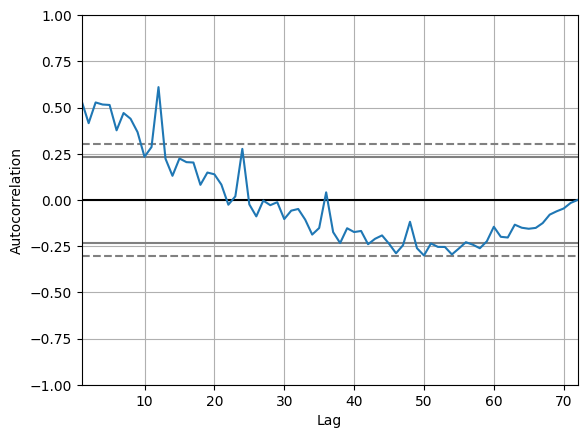

In [5]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
#p=9

c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


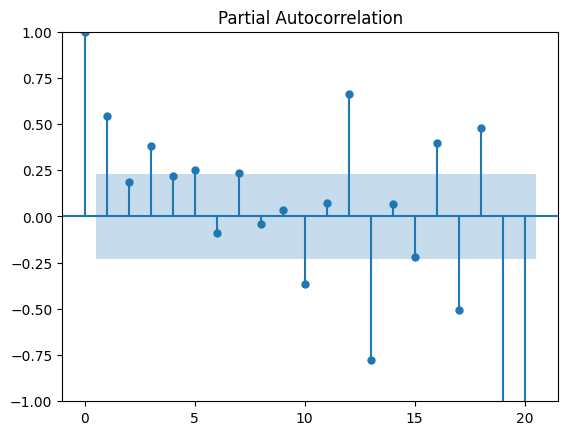

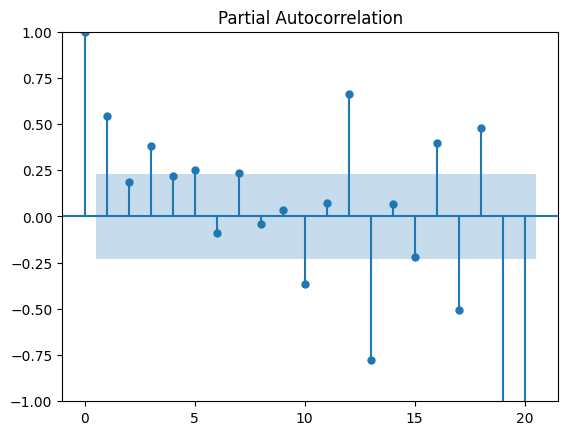

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df,lags=20)
##q=6

In [7]:
import statsmodels.api as sm
train=df.iloc[:-15]
test=df.iloc[-15:]
model = sm.tsa.arima.ARIMA(train, order=(9,0,6))
model = model.fit()

c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\users\isaac\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\isaac\

In [8]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2014-07-01    432136.122908
2014-08-01    440751.327305
2014-09-01    420799.123163
2014-10-01    418090.725597
2014-11-01    443848.894027
2014-12-01    487557.224575
2015-01-01    416396.081430
2015-02-01    401245.992582
2015-03-01    439243.981799
2015-04-01    436375.099950
2015-05-01    458767.634162
2015-06-01    430966.888011
2015-07-01    432879.168998
2015-08-01    440988.963864
2015-09-01    419032.297519
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='date'>

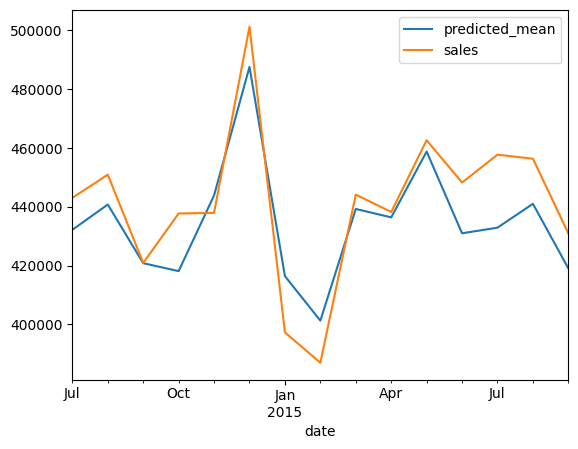

In [9]:
pred.plot(legend=True)
test['sales'].plot(legend=True)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
r2_score(test,pred)

0.7306356092867505

In [12]:
mean_squared_error(test,pred)

182192915.5814864

In [13]:
mean_absolute_error(test,pred)

11577.760679092673

In [17]:
df = pd.read_csv('C:/Users/Isaac/Downloads/retail_sales.csv',index_col='date',parse_dates=True)

In [6]:
df=df.reset_index()

In [7]:
df=df.rename(columns={'date':'ds', 'sales':'y'})
df.tail()

,ds,y
67,2015-05-01,462615
68,2015-06-01,448229
69,2015-07-01,457710
70,2015-08-01,456340
71,2015-09-01,430917


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      72 non-null     datetime64[ns]
 1   y       72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.


In [10]:
model = Prophet()
model.fit(df);
df.tail()

18:18:28 - cmdstanpy - INFO - Chain [1] start processing
18:18:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
67,2015-05-01,462615
68,2015-06-01,448229
69,2015-07-01,457710
70,2015-08-01,456340
71,2015-09-01,430917


In [11]:
future = model.make_future_dataframe(periods=0, freq = 'm')
future.tail()

,ds
67,2015-05-01
68,2015-06-01
69,2015-07-01
70,2015-08-01
71,2015-09-01


In [12]:
forecast = model.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
67,2015-05-01,459984.836015,454245.728058,465401.584578
68,2015-06-01,448605.317668,443127.994458,454474.568117
69,2015-07-01,453589.278882,448052.215116,459544.034820
70,2015-08-01,455140.347837,449636.506072,460894.932302
71,2015-09-01,433037.517311,427540.688962,438686.801883


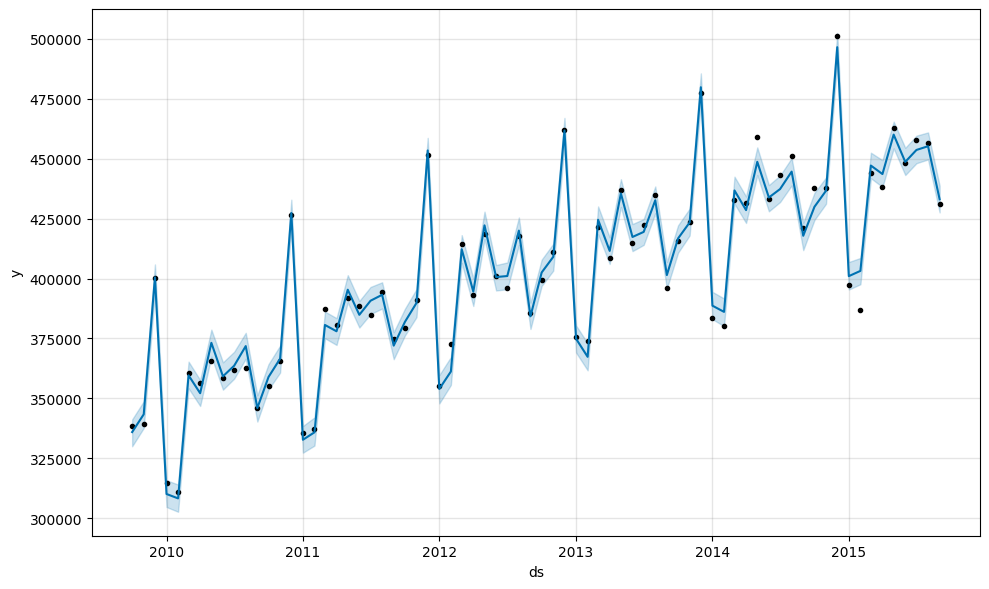

In [14]:
model.plot(forecast);

In [25]:
new_metric = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
new_metric.dropna(inplace=True)

In [26]:
r2_score(new_metric.y, new_metric.yhat)

0.9877986969691978

In [27]:
mean_squared_error(new_metric.y, new_metric.yhat)

19250404.840484288

In [28]:
mean_absolute_error(new_metric.y, new_metric.yhat)

3357.374499882624

In [49]:
from prophet.serialize import model_to_json, model_from_json

with open('revenue_model.json', 'w') as fout:
    fout.write(model_to_json(model))
    ##save model